In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model


/home/matthias/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data() # dans https://stackoverflow.com/questions/51971192/where-is-the-downloaded-keras-dataset-stored

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print (x_train.shape)
print (x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [12]:
latent_dim = 64
s = x_train.shape
d = s[1]*s[2]

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   


        self.encoder = tf.keras.Sequential([
          layers.Flatten(),
          layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
          layers.Dense(d, activation='sigmoid'),
          layers.Reshape(s[1:])
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)


In [16]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [17]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
1875/1875 [==============================] - 2s 840us/step - loss: 0.0093 - val_loss: 0.0091
Epoch 2/5
1875/1875 [==============================] - 1s 782us/step - loss: 0.0091 - val_loss: 0.0091
Epoch 3/5
1875/1875 [==============================] - 1s 743us/step - loss: 0.0089 - val_loss: 0.0090
Epoch 4/5
1875/1875 [==============================] - 1s 772us/step - loss: 0.0089 - val_loss: 0.0090
Epoch 5/5
1875/1875 [==============================] - 1s 787us/step - loss: 0.0089 - val_loss: 0.0089


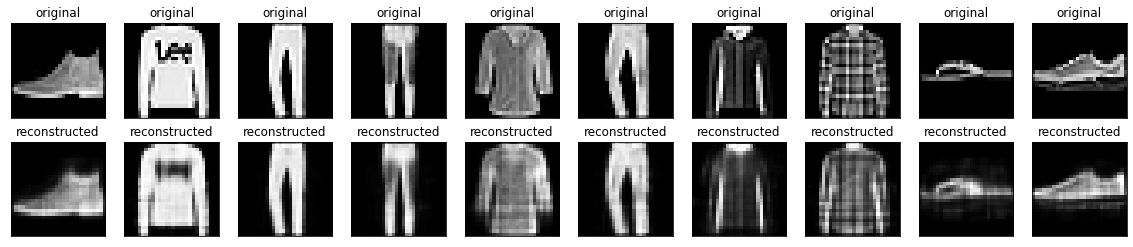

In [18]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
